# Importing Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

## Filtering Data

In [8]:
df_DA_IN = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')]

In [9]:
df_DA_IN.sample(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
781476,Data Analyst,Colgate Jobs 2023 - Jobs Near Me - Data Analys...,Anywhere,via Jobsleworld - Jobs In India - Job Vacancie...,Full-time,True,India,2023-01-14 06:13:17,True,False,India,None,NaN,NaN,Colgate,None,None
88873,Data Analyst,Intern- Logistics Data Analyst,India,via Bayt.com,Internship,False,India,2023-05-13 00:28:44,False,False,India,None,NaN,NaN,Pfizer Inc,"[tableau, excel]","{'analyst_tools': ['tableau', 'excel']}"
589959,Data Analyst,Wipro Careers 2023 - All India Jobs - Data Ana...,Anywhere,via Home - Jobs In India - Job Vacancies In In...,Full-time,True,India,2023-07-24 09:11:43,True,False,India,None,NaN,NaN,Wipro,None,None
434140,Data Analyst,Data Analyst Qliksense,India,via Indeed,Full-time,False,India,2023-12-19 16:11:35,False,False,India,None,NaN,NaN,CAPCO,"[sql, qlik]","{'analyst_tools': ['qlik'], 'programming': ['s..."
252756,Data Analyst,Freelance Big Data Analyst,Anywhere,via LinkedIn,Contractor,True,India,2023-12-10 07:10:53,False,False,India,None,NaN,NaN,College Toppr,"[python, r, sql, nosql, mongodb, mongodb, hado...","{'analyst_tools': ['tableau'], 'databases': ['..."
506455,Data Analyst,Data Analyst,"Jaipur, Rajasthan, India",via LinkedIn,Full-time,False,India,2023-05-05 11:30:05,False,False,India,None,NaN,NaN,Minimalist,[sql],{'programming': ['sql']}
342693,Data Analyst,Consulting: BO: Operations Transformation: Con...,India,via Jobrapido.com,Full-time,False,India,2023-06-27 23:34:00,False,False,India,None,NaN,NaN,Deloitte,"[python, r, sql, java, javascript, nosql]","{'programming': ['python', 'r', 'sql', 'java',..."
1751,Data Analyst,Data Analytics Internship in Bangalore at Nunam,India,via LinkedIn,Full-time,False,India,2023-07-10 13:32:38,False,False,India,None,NaN,NaN,Nunam,[python],{'programming': ['python']}
70709,Data Analyst,Analytics Team Lead,India,via Recruit.net,Full-time,False,India,2023-01-08 00:08:41,False,False,India,None,NaN,NaN,The Good Glamm Group,"[r, sql, excel, qlik, power bi]","{'analyst_tools': ['excel', 'qlik', 'power bi'..."
530976,Data Analyst,Data Analyst Entry Level_,Anywhere,via LinkedIn,Full-time,True,India,2023-10-17 19:12:36,False,False,India,None,NaN,NaN,SAZ India,"[python, aws, redshift, pandas, flow]","{'cloud': ['aws', 'redshift'], 'libraries': ['..."


## Plotting


### Job Postings as Per Location

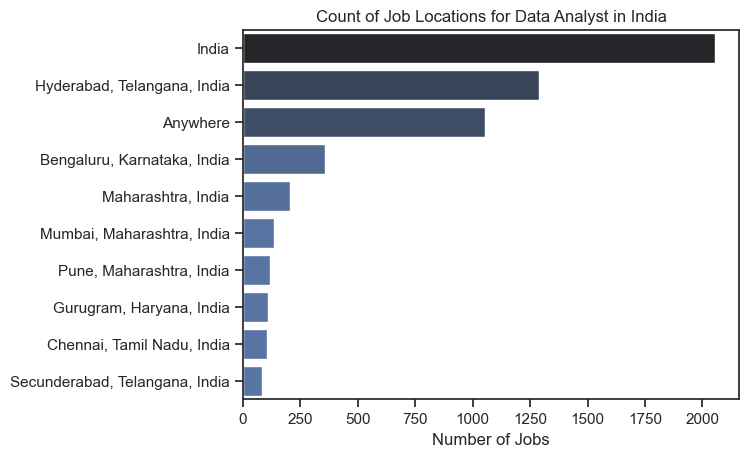

In [10]:
df_plot = df_DA_IN['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location',hue='count',palette='dark:b_r',legend=False)
plt.title('Count of Job Locations for Data Analyst in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()



### Job type and requirements

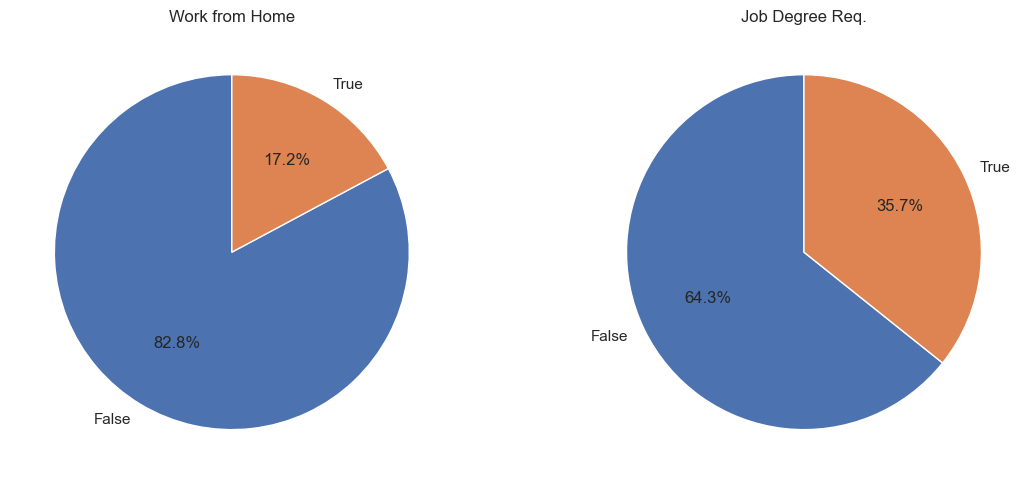

In [11]:
dict_column = {
  'job_work_from_home':'Work from Home',
  'job_no_degree_mention': 'Job Degree Req.',
  }

fig,ax = plt.subplots(1,2)
fig.set_size_inches((12,5))

for i,(column,title) in enumerate(dict_column.items()):
  #print(i,column,title)
  # value_counts = df_DA_IN[column].value_counts()
  # labels = value_counts.index.astype(str).tolist()
  ax[i].pie(df_DA_IN[column].value_counts(),labels=['False','True'], startangle=90,autopct='%1.1f%%')
  ax[i].set_title(title)

plt.tight_layout()
plt.show()

### Top 10 Companies with Highest Number of Data Analyst Job Postings

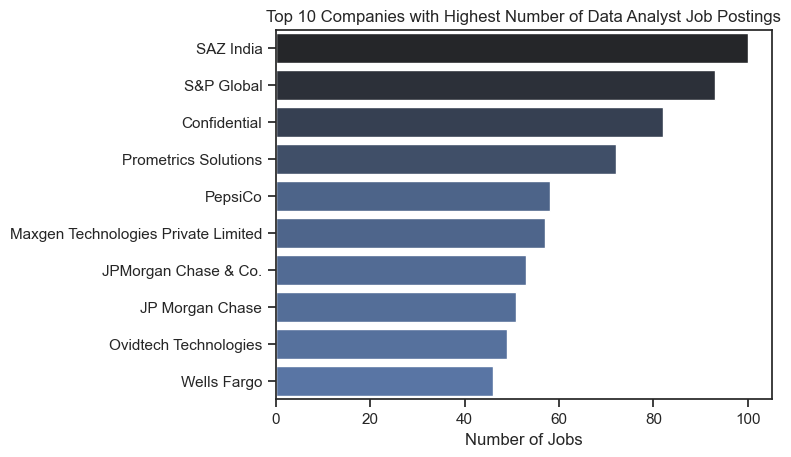

In [12]:
df_plot = df_DA_IN['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name',hue='count',palette='dark:b_r',legend=False)
plt.title('Top 10 Companies with Highest Number of Data Analyst Job Postings')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


### Top 5 platforms with Job Postings For Data Analyst in India

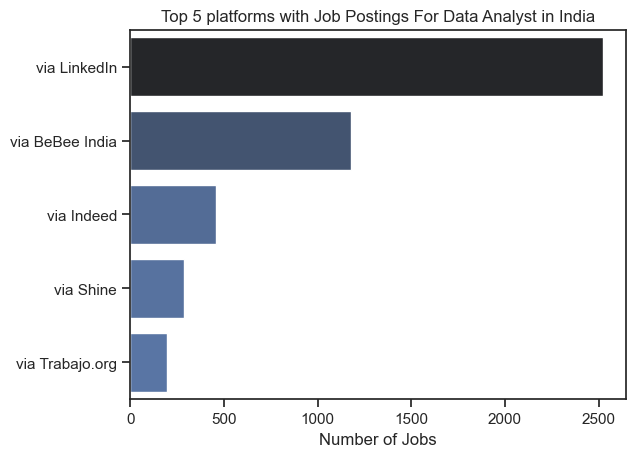

In [13]:
df_plot = df_DA_IN['job_via'].value_counts().head(5).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_via',hue='count',palette='dark:b_r',legend=False)
plt.title('Top 5 platforms with Job Postings For Data Analyst in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()